## Regularization - Lasso & Ridge

    * SLR - y= mx+c 
        * w/o presence of outlier  - y = 2x+3
        * in presence of outlier  - y = 5x+3
        
        * Lasso & Ridge == some where middle in above - reduced effect of outlier say = 3x+3
        
    * the m & c not only gets affected due to presence of outlier but also gets affected when there is overfitting, so by              restricting more variation of m & c it prevents overfitting 
        
    * Overfitting - Model gives best accuracy on Training data but while on testing data it reduces drastically 
    
    
    * Lasso & Ridge Reduces 
        * the impact of Outliers on model
        * Prevents Overfitting
        
    * In presence of outlier Linear Model will shift towards outlier, in lasso & ridge the shifting will be resisted by some         amount but not completely.
    
**MODEL = Loss + r.alpha *(|m1| + |c|) + (1-r) alpha*(|m1|^2 + |c|^2)
    
    * lasso model  =  loss + r*alpha * (|m1| + |c|)   -- Feature Selection  -- Draw Square boundary == r = 1
    * ridge Model = loss + (1-r)*alpha/2 * (|m1|^2 + |c|^2) -- Regularization -- Draws circle boundary == r = 0
    
### Elastic Net

    * it is combination of Ridge & Lasso
    * Elastic Net = loss + (1-r)*alpha/2 * (|m1|^2 +|c|^2) +  r.alpha  * (| m1| +|c|)
    *                      regularizes                  features importance

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# Importing Data Set

from sklearn import datasets 

In [3]:
# Importing Regression lib

from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import r2_score

# Split the data
from sklearn.model_selection import train_test_split


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing regularizing lib

# Ridge 
from sklearn.linear_model import Ridge 

# Lasso
from sklearn.linear_model import Lasso

# Elastic Net
from sklearn.linear_model import ElasticNet


## Data Processing

In [6]:
# Loading pre-defined Boston Dataset

boston = datasets.load_boston()

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
### Optinal method

In [11]:
boston_dataframe = pd.DataFrame(data = boston['data'], columns= boston['feature_names'])

In [12]:
boston_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
#Load the data and divide into X and Y varaiable

boston_df = pd.DataFrame(boston.data)   # assigning DataFrame to data above
boston_df.columns = boston['feature_names']  # assigning column names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
boston_df['House_Price'] = boston['target']

In [16]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# input 
x = boston_df.iloc[:, :-1] 

#output 
y = boston_df.iloc[:, -1] 


In [18]:
# splitting the Data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [19]:
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((379, 13), (379,), (127, 13), (127,))

## Linear Regression

In [20]:
# Apply multiple Linear Regression Model 

lr = LinearRegression()

reg_model = lr.fit(x_train,y_train)

# prediction on test data
pred_test = reg_model.predict(x_test)

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((y_test - pred_test)**2)
print(f'Mean Squared Error on test Set is = {mean_squared_error}')


Mean Squared Error on test Set is = 26.70207507909581


In [21]:
# Putting together the coefficient and their corrsponding variable names

reg_coefficient = pd.DataFrame()

reg_coefficient['Coefficient'] = reg_model.coef_
reg_coefficient['Columns'] = x_test.columns

reg_coefficient 

,Coefficient,Columns
0,-0.107116,CRIM
1,0.049626,ZN
2,0.000367,INDUS
3,2.287449,CHAS
4,-15.996474,NOX
5,3.944684,RM
6,-0.017040,AGE
7,-1.453710,DIS
8,0.285546,RAD
9,-0.013249,TAX


<AxesSubplot:xlabel='Coefficient', ylabel='Columns'>

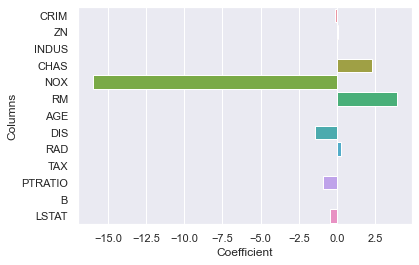

In [22]:
# Visualizing the effect of various Features 

sns.barplot(reg_coefficient['Coefficient'],reg_coefficient['Columns'])

## Ridge 

In [23]:
# creating the Model ------    Train the model (l1_ratio = r, r=0 for Ridge, r=1 for Lasso)
ridge =Ridge(alpha=1)
model_ridge = ridge.fit(x_train,y_train)

In [24]:
# predicting on test Data
pred_ridge_test = model_ridge.predict(x_test)

In [25]:
# Calculating mean Squared Value - mse
mean_squared_error_ridge = np.mean((y_test - pred_ridge_test)**2)
print(f'Mean Squared Error on test Set is = {mean_squared_error_ridge}')

Mean Squared Error on test Set is = 27.22218053303733


In [26]:
# Putting together the coefficient and their corrsponding variable names

ridge_coefficient = pd.DataFrame()

ridge_coefficient['Columns'] = x_test.columns
ridge_coefficient['Coefficient'] = model_ridge.coef_
ridge_coefficient


,Columns,Coefficient
0,CRIM,-0.103786
1,ZN,0.050962
2,INDUS,-0.033513
3,CHAS,2.096260
4,NOX,-8.739423
5,RM,4.005607
6,AGE,-0.023728
7,DIS,-1.359672
8,RAD,0.268928
9,TAX,-0.013838


In [ ]:
# ridge has less coefficient = 0
# it regularizes

<AxesSubplot:xlabel='Coefficient', ylabel='Columns'>

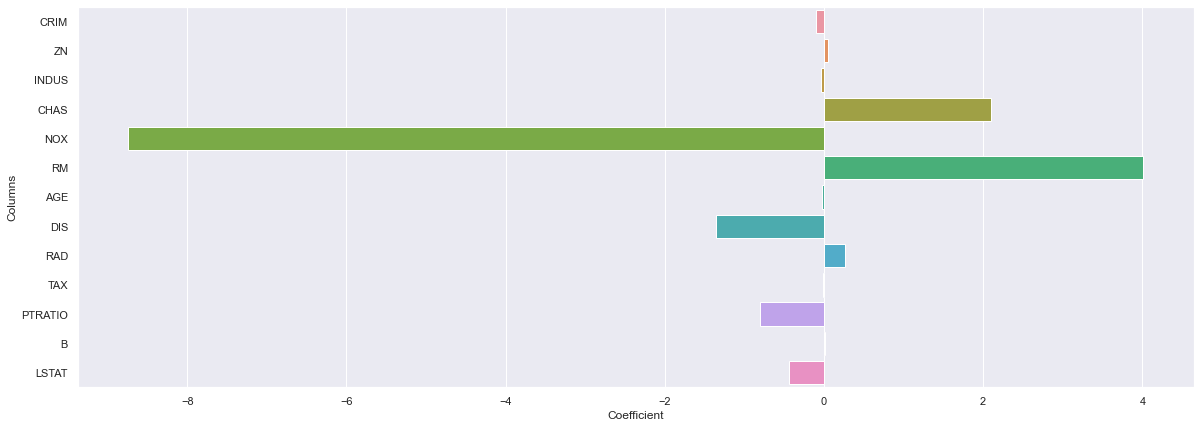

In [27]:
# Visualization
plt.figure(figsize=(20,7))
sns.barplot(ridge_coefficient['Coefficient'],ridge_coefficient['Columns'])

## Lasso 

In [28]:
# creating the Model ---  Train the model (l1_ratio = r, r=0 for Ridge, r=1 for Lasso)
l = Lasso(alpha=1)

model_lasso = l.fit(x_train,y_train)

#predicting on test data

pred_lasso_test = model_lasso.predict(x_test) 

# calculating the mse
mean_squared_error_lasso = np.mean((y_test - pred_lasso_test)**2)
print(f'Mean Squared Error on test Set is = {mean_squared_error_lasso}')


Mean Squared Error on test Set is = 32.26492433600716


In [29]:
# Putting together the coefficient and their corrsponding variable names

lasso_coefficient = pd.DataFrame()

lasso_coefficient['Columns'] = x_test.columns
lasso_coefficient['Coefficient'] = model_lasso.coef_
lasso_coefficient

,Columns,Coefficient
0,CRIM,-0.065488
1,ZN,0.054660
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.147798
6,AGE,0.000000
7,DIS,-0.732628
8,RAD,0.249683
9,TAX,-0.016352


In [ ]:
# the features with coefficient =0 has less importance
# Lasso focuses on feature importance

<AxesSubplot:xlabel='Coefficient', ylabel='Columns'>

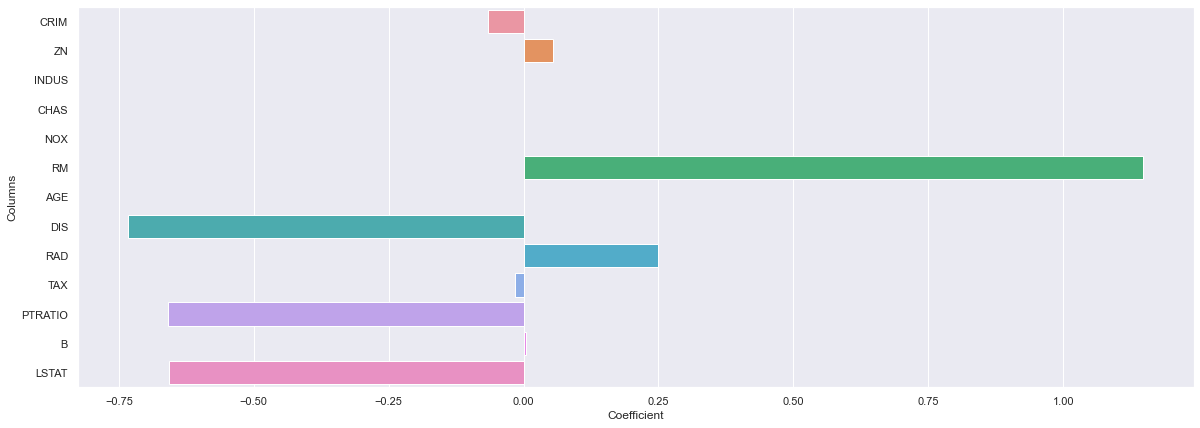

In [30]:
# Visualization
plt.figure(figsize=(20,7))
sns.barplot(lasso_coefficient['Coefficient'],lasso_coefficient['Columns'])

## Elastic Net

In [31]:
# Creating Model -- Train the model (l1_ratio = r, r=0 for Ridge, r=1 for Lasso)

elastic = ElasticNet(alpha=0.4, l1_ratio= 0.5)

model_elastic = elastic.fit(x_train,y_train)

# predicting on test data

pred_elastic_test = model_elastic.predict(x_test)

# calculating the mse
mean_squared_error_elastic= np.mean((y_test - pred_elastic_test)**2)
print(f'Mean Squared Error on test Set is = {mean_squared_error_elastic}')

Mean Squared Error on test Set is = 29.77800524287629


In [32]:
# Putting together the coefficient and their corrsponding variable names

elastic_coefficient = pd.DataFrame()

elastic_coefficient['Columns'] = x_test.columns
elastic_coefficient['Coefficient'] = model_elastic.coef_
elastic_coefficient

,Columns,Coefficient
0,CRIM,-0.093084
1,ZN,0.058028
2,INDUS,-0.048082
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.084510
6,AGE,-0.011354
7,DIS,-1.072974
8,RAD,0.290431
9,TAX,-0.016764


<AxesSubplot:xlabel='Coefficient', ylabel='Columns'>

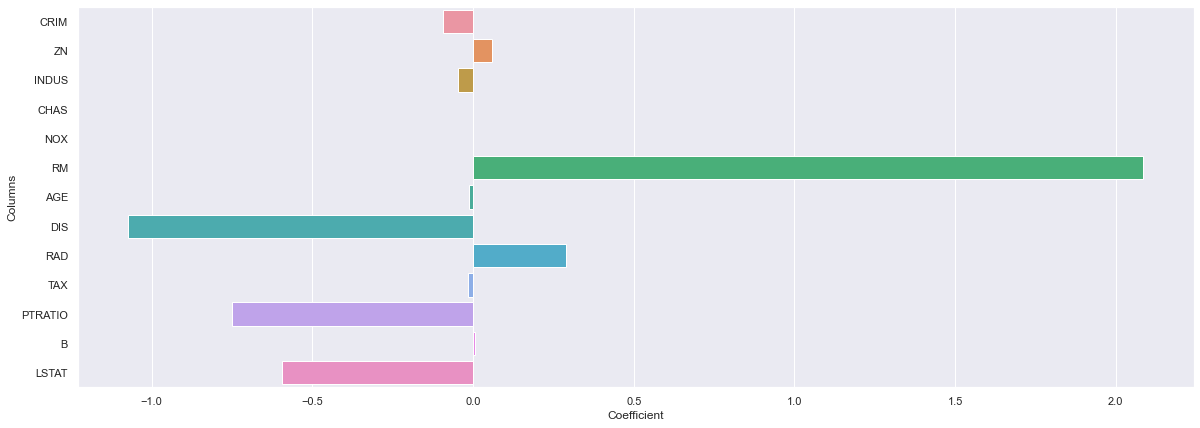

In [33]:
# visualization
plt.figure(figsize=(20,7))
sns.barplot(elastic_coefficient['Coefficient'],elastic_coefficient['Columns'])

In [ ]:
# comines the effect of lasso & ridge
# ridge - regularize the data
# lasso - feature selection